<a href="https://colab.research.google.com/github/anupbagale/2D_Classification/blob/main/COVID_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setup imports

In [2]:
# Import necessary libraries for plotting, TensorFlow, and Keras layers/models.
# We're using Matplotlib for plotting and TensorFlow with Keras for building and training the model.

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Setup training dataset and datagenerator

In [3]:
# Data augmentation and preprocessing for training images.
train_datagen= ImageDataGenerator(

     rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         vertical_flip=True
)

train_data= train_datagen.flow_from_directory(
    directory= 'path_to_training_dataset',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1726 images belonging to 2 classes.


In [4]:
train_data.class_indices

{'COVID19': 0, 'NORMAL': 1}

### Setup testing dataset and datagenerator

In [5]:

test_datagen= ImageDataGenerator(

     rescale=1./255,

)

test_data= test_datagen.flow_from_directory(
    directory= 'path_to_test_dataset',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 433 images belonging to 2 classes.


In [6]:
test_data.class_indices

{'COVID19': 0, 'NORMAL': 1}

### Create Custom Callback

In [7]:
# Create a custom callback to collect training metrics during each epoch.
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

    def on_epoch_end(self, epoch, logs=None):
      # Store training metrics in the history dictionary.
        for key in logs:
            self.history[key].append(logs[key])

# Initialize the custom callback
metrics_callback = MetricsCallback()


### Create model architecture

In [8]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with optimizer, loss function, and metrics.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

### Run training loop

In [10]:
model.fit(train_data, steps_per_epoch=len(train_data), epochs=10,
          validation_data=test_data, validation_steps=len(test_data),
          callbacks=[metrics_callback])


Epoch 1/10
54/54 [==============================] - 323s 6s/step - loss: 0.6683 - accuracy: 0.7277 - val_loss: 0.3707 - val_accuracy: 0.7321
Epoch 2/10
54/54 [==============================] - 90s 2s/step - loss: 0.3846 - accuracy: 0.8059 - val_loss: 0.2045 - val_accuracy: 0.9376
Epoch 3/10
54/54 [==============================] - 90s 2s/step - loss: 0.3082 - accuracy: 0.8714 - val_loss: 0.1516 - val_accuracy: 0.9538
Epoch 4/10
54/54 [==============================] - 89s 2s/step - loss: 0.2805 - accuracy: 0.8917 - val_loss: 0.1085 - val_accuracy: 0.9607
Epoch 5/10
54/54 [==============================] - 89s 2s/step - loss: 0.2611 - accuracy: 0.9038 - val_loss: 0.1293 - val_accuracy: 0.9561
Epoch 6/10
54/54 [==============================] - 89s 2s/step - loss: 0.2583 - accuracy: 0.9038 - val_loss: 0.1086 - val_accuracy: 0.9723
Epoch 7/10
54/54 [==============================] - 90s 2s/step - loss: 0.2289 - accuracy: 0.9166 - val_loss: 0.1202 - val_accuracy: 0.9723
Epoch 8/10
54/54 [=

In [13]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plot the loss and accuracy

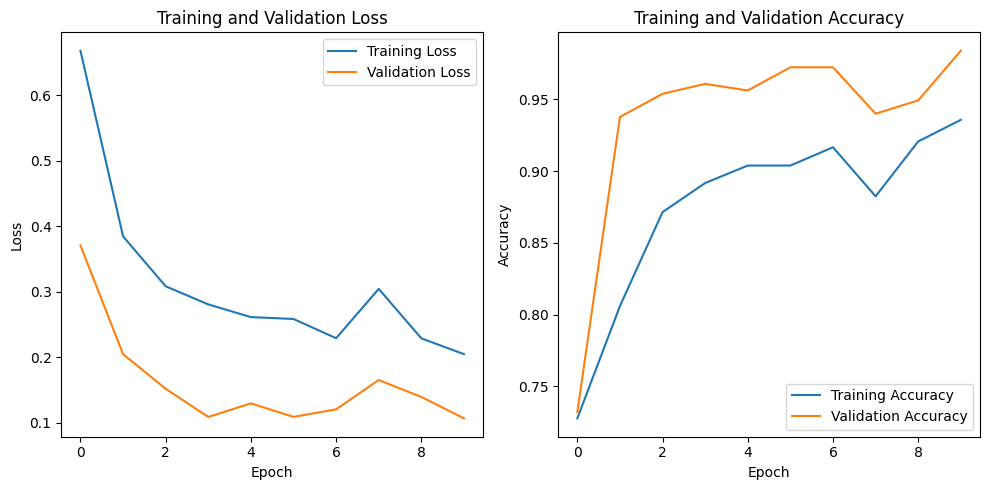

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(metrics_callback.history['loss'], label='Training Loss')
plt.plot(metrics_callback.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(metrics_callback.history['accuracy'], label='Training Accuracy')
plt.plot(metrics_callback.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Random check

In [23]:
path="path_to_random_image"
img=image.load_img(path,target_size=(256,256))

img= image.img_to_array(img)/255
img=np.expand_dims(img,axis=0)
predictions = (model.predict(img) > 0.5).astype("int32")
print(predictions)
if predictions[0][0]==0:
  print("Covid")
else:
  print("Normal")

1/1 [==============================] - 0s 38ms/step
[[0]]
Covid


In [25]:
path="path_to_random_image"
img=image.load_img(path,target_size=(256,256))

img= image.img_to_array(img)/255
img=np.array([img])
predictions = (model.predict(img) > 0.5).astype("int32")
print(predictions)
if predictions[0][0]==0:
  print("Covid")
else:
  print("Normal")

1/1 [==============================] - 0s 37ms/step
[[1]]
Normal
